In [1]:
import numpy as np
import modin.pandas as mipd
import os
import time
import pandas as pd
from tqdm import tqdm
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
time_resolution = '1week'

data_path = '/mnt/data0/proj_osgeo/data_ASF_trial/network_data'+time_resolution+'/'

c_path = './network_data'+time_resolution+'/commits/'
e_path = './network_data'+time_resolution+'/emails/'
mix_path = './network_data'+time_resolution+'/mix/'
#c_path = './network_data/commits/'

df_tech_jaccards = pd.read_csv("./tech_jaccards"+time_resolution+".csv")
df_social_jaccards = pd.read_csv("./social_jaccards"+time_resolution+".csv")
df_mix_jaccards = pd.read_csv("./mix_jaccards"+time_resolution+".csv")

projects = os.listdir(c_path)
project_names = [x.split('__')[0] for x in projects]
project_names_tech = pd.Series(project_names).drop_duplicates().values

projects = os.listdir(e_path)
project_names = [x.split('__')[0] for x in projects]
project_names_social = pd.Series(project_names).drop_duplicates().values

In [3]:
len(df_tech_jaccards.index)

209

In [4]:
%matplotlib inline

In [5]:
all_graduated = np.load('all_graduated.npy').tolist()
#all_graduated = [x.lower() for x in all_graduated]
all_retired = np.load('all_retired.npy').tolist()
#all_retired = [x.lower() for x in all_retired]

In [5]:
def remove_minus(list):
    while -1.0 in list :
        list.remove(-1.0)
    return list

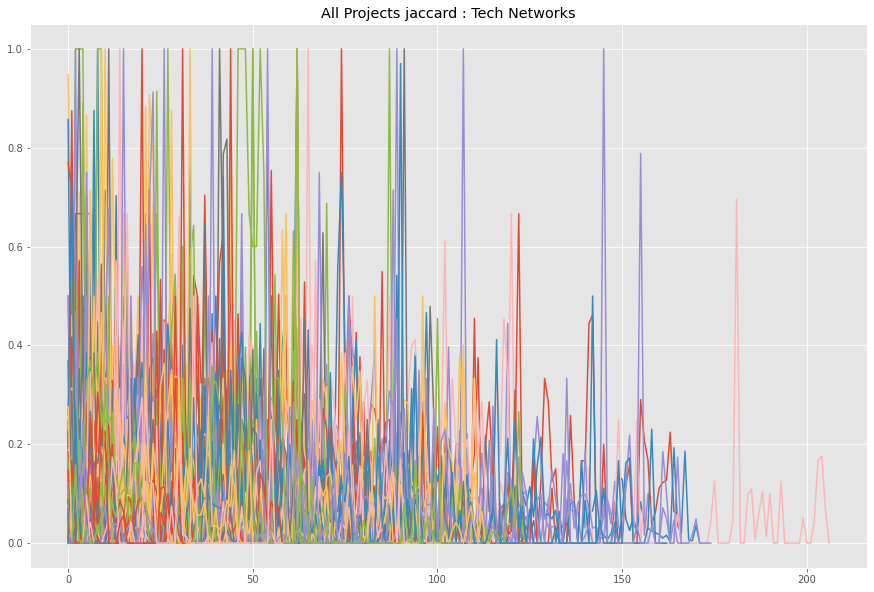

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

for col in df_tech_jaccards.columns:
    data = df_tech_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
    #print(data[:i])

    x = range(len(data[:i]))

    plt.plot(x,data[:i])
    plt.title("All Projects jaccard : Tech Networks")
    

<BarContainer object of 207 artists>

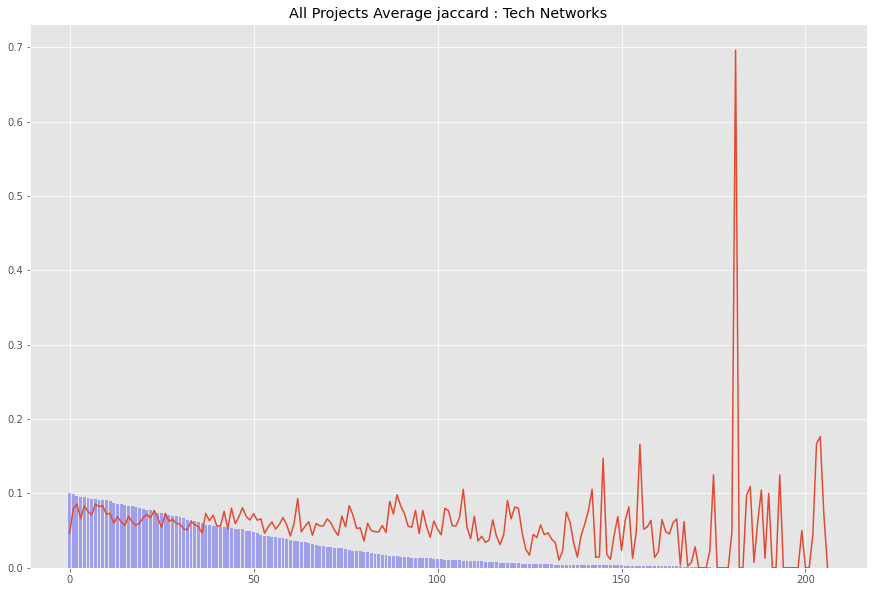

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_tech_jaccards.index))]
count = [0 for i in range(len(df_tech_jaccards.index))]

for col in df_tech_jaccards.columns:
    data = df_tech_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])

plt.title("All Projects Average jaccard : Tech Networks")

#print(ave)
#print(count)
len(df_tech_jaccards.loc[0].values)
plt.bar(x,np.array(count[:i])/len(df_tech_jaccards.columns)/10, fc='b', alpha=0.3)
#plt.boxplot([df_tech_jaccards.loc[0].values], label=[0])

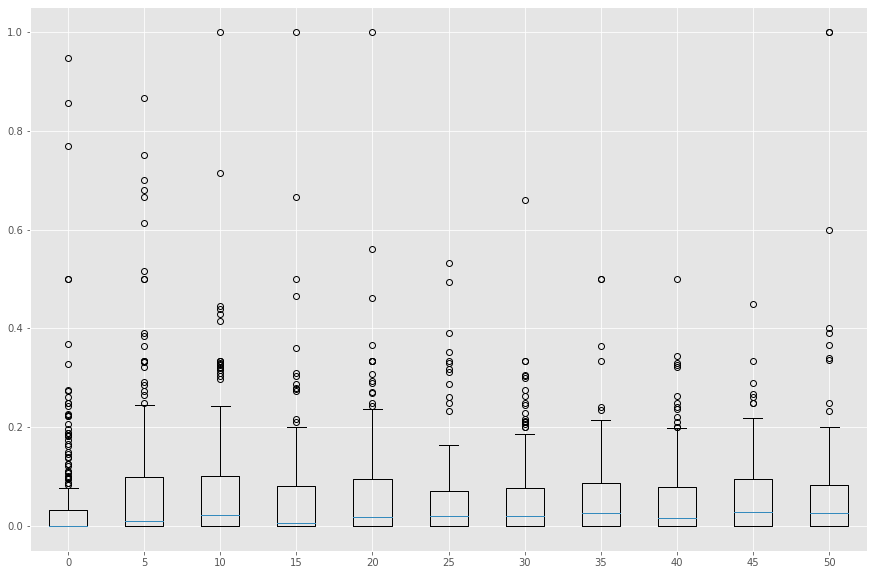

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_tech_jaccards.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)




plt.boxplot(datas_t, labels=labels_time)
plt.show()

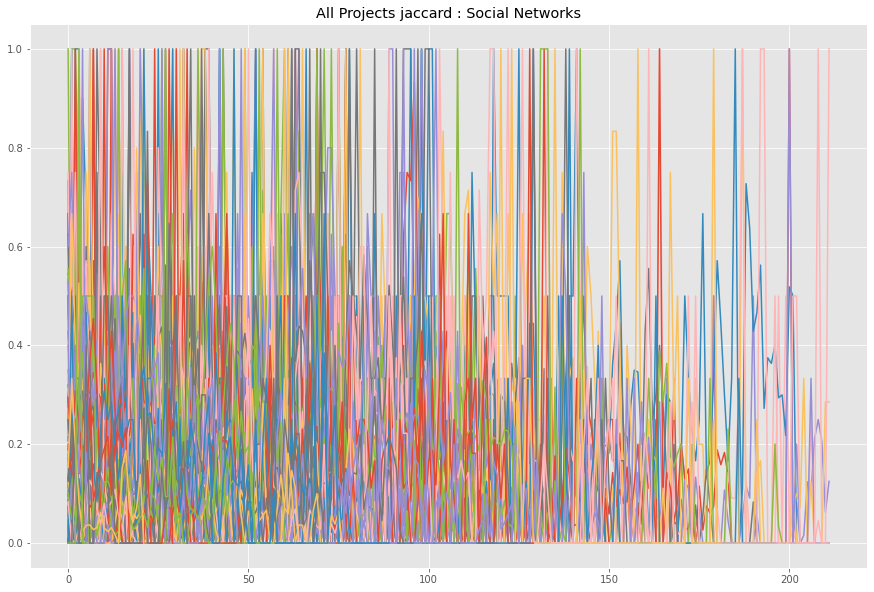

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

for col in df_social_jaccards.columns:
    data = df_social_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
    #print(data[:i])

    x = range(len(data[:i]))

    plt.plot(x,data[:i])
    plt.title("All Projects jaccard : Social Networks")

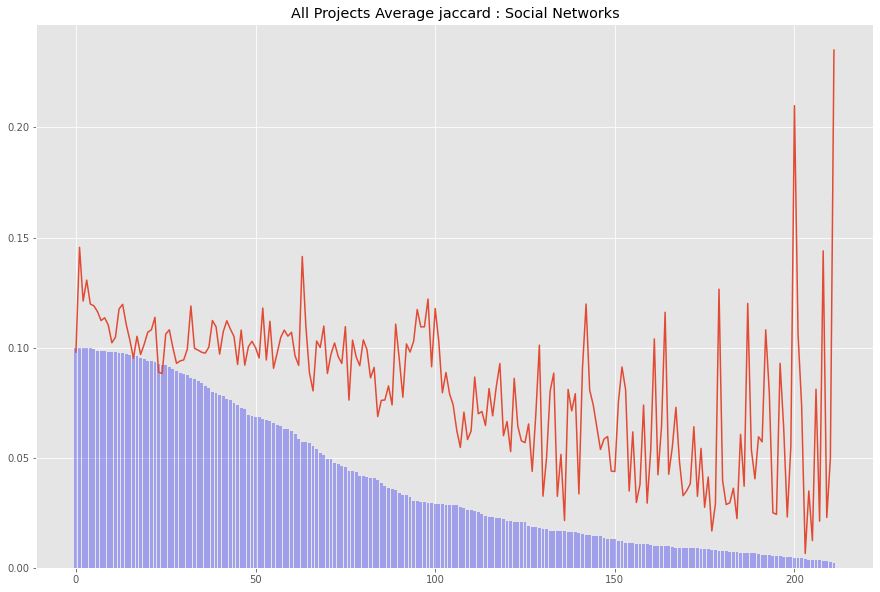

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_social_jaccards.index))]
count = [0 for i in range(len(df_social_jaccards.index))]

for col in df_social_jaccards.columns:
    data = df_social_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])
plt.title("All Projects Average jaccard : Social Networks")

plt.bar(x,np.array(count[:i])/len(df_social_jaccards.columns)/10, fc='b', alpha=0.3)
#print(ave)
#print(count)
plt.show()

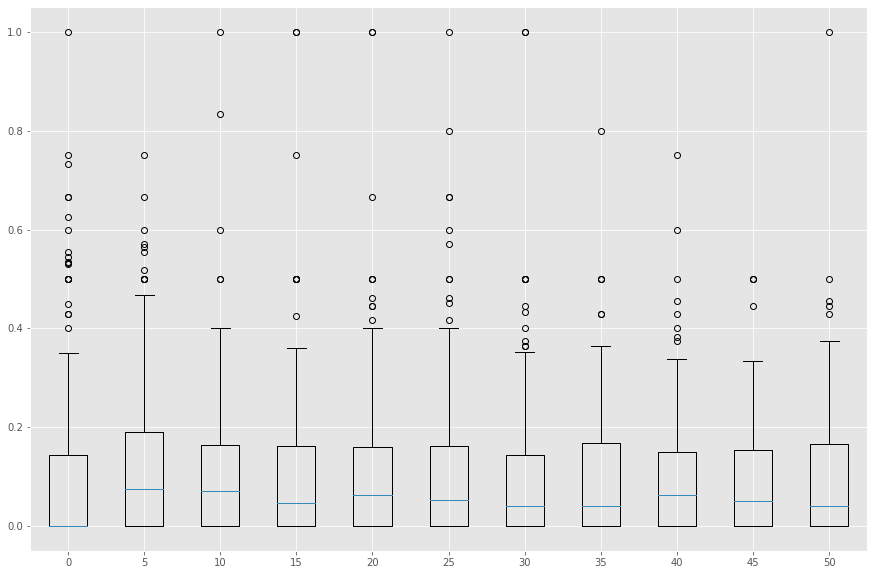

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_social_jaccards.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)




plt.boxplot(datas_t, labels=labels_time)
plt.show()

In [12]:
df_incubating = pd.read_csv('/mnt/data0/lkyin/incubating.csv')
df_graduated = pd.read_csv('/mnt/data0/lkyin/graduated.csv')
df_retired = pd.read_csv('/mnt/data0/lkyin/retired.csv')

In [13]:
c_path = '/mnt/data0/lkyin/monthly_data/commits/'
projects = os.listdir(c_path)
print("Total:", len(projects), "months")

proj_names = []
proj_ids= []
proj_status = []
for project in tqdm(projects):
    project_name, period = project.replace('.csv', '').split('__')
    proj_ids.append(project_name)
    if project_name in df_incubating["alias"].values :
        proj_status.append("incubating")
        proj_names.append(str(df_incubating.loc[df_incubating["alias"] == project_name]["project_name"].values[0]))
    elif project_name in df_graduated["alias"].values :
        proj_status.append('graduated')
        proj_names.append(str(df_graduated.loc[df_graduated["alias"] == project_name]["project_name"].values[0]))
    elif project_name in df_retired["alias"].values :
        proj_status.append('retired')
        proj_names.append(str(df_retired.loc[df_retired["alias"] == project_name]["project_name"].values[0]))
    else:
        proj_status.append('unknown')
        proj_names.append('unknown')

Total: 4327 months


100%|██████████| 4327/4327 [00:01<00:00, 4004.47it/s]


In [14]:
tech_proj_names = pd.Series(proj_names)
print(tech_proj_names.describe())

tech_proj_ids = pd.Series(proj_ids)

tech_proj_status = pd.Series(proj_status)
print(tech_proj_status.unique())

df_proj_tech = pd.DataFrame()
df_proj_tech['project_name'] = tech_proj_names
df_proj_tech['project_aliase'] = tech_proj_ids
df_proj_tech['project_status'] = tech_proj_status

df_proj_tech = df_proj_tech.drop_duplicates()
df_proj_tech.describe()

count        4327
unique        263
top       JSPWiki
freq           63
dtype: object
['retired' 'graduated']


,project_name,project_aliase,project_status
count,263,263,263
unique,263,263,2
top,Taverna,taverna,graduated
freq,1,1,204


In [15]:
all_graduated = df_proj_tech.where(df_proj_tech['project_status']=='graduated')["project_name"].dropna().unique().tolist()
for col in all_graduated:
    if col not in df_tech_jaccards:
        all_graduated.remove(col)
    elif col not in df_social_jaccards:
        all_graduated.remove(col)
len(all_graduated)
#print(all_graduated)

204

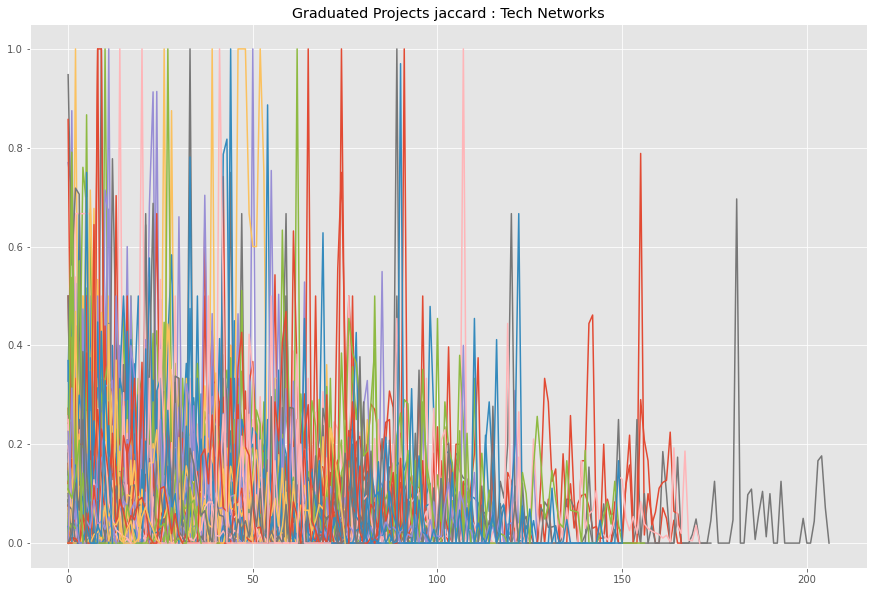

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

for col in all_graduated:
    #print(col)
    data = df_tech_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
    #print(data[:i])

    x = range(len(data[:i]))

    plt.plot(x,data[:i])
    plt.title("Graduated Projects jaccard : Tech Networks")
    

<BarContainer object of 207 artists>

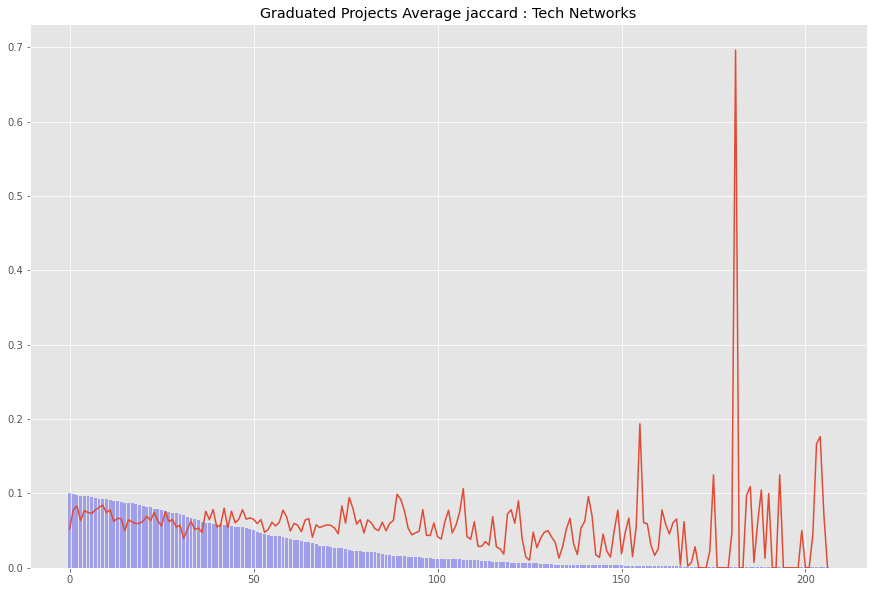

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_tech_jaccards.index))]
count = [0 for i in range(len(df_tech_jaccards.index))]

for col in all_graduated:
    data = df_tech_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])

plt.title("Graduated Projects Average jaccard : Tech Networks")

#print(ave)
#print(count)
len(df_tech_jaccards.loc[0].values)
plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
#plt.boxplot([df_tech_jaccards.loc[0].values], label=[0])

Text(0.5, 1.0, 'Graduated Projects Average jaccard : Tech Networks')

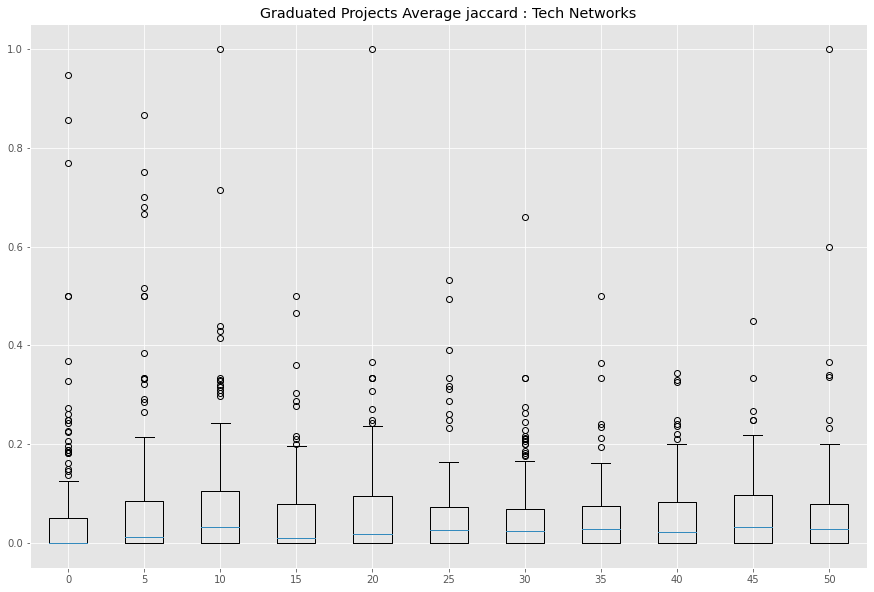

In [18]:
df_tech_jaccards_graduated = df_tech_jaccards[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_tech_jaccards_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)



plt.boxplot(datas_t, labels=labels_time)
plt.title("Graduated Projects Average jaccard : Tech Networks")

<BarContainer object of 212 artists>

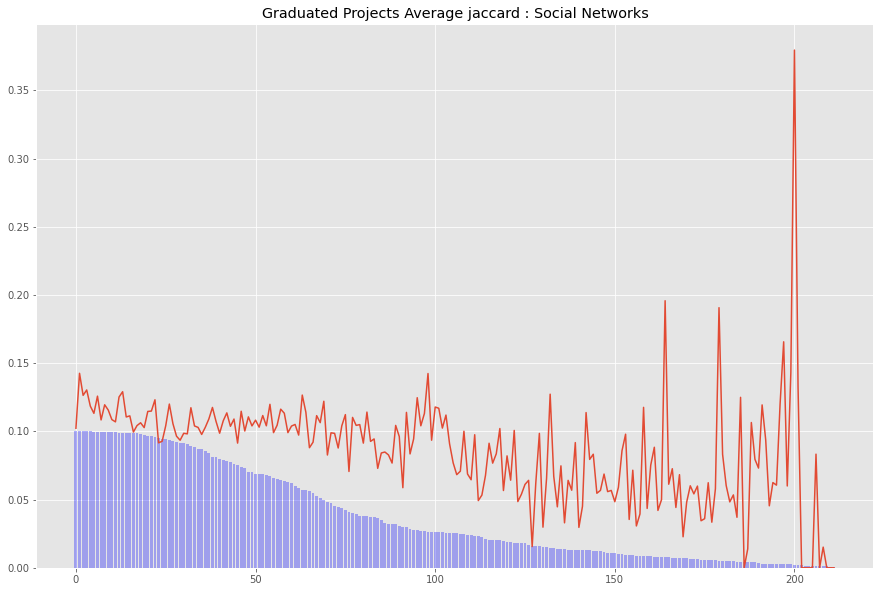

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_social_jaccards.index))]
count = [0 for i in range(len(df_social_jaccards.index))]
for col in all_graduated:
    data = df_social_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])
plt.title("Graduated Projects Average jaccard : Social Networks")

plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
#print(ave)
#print(count)

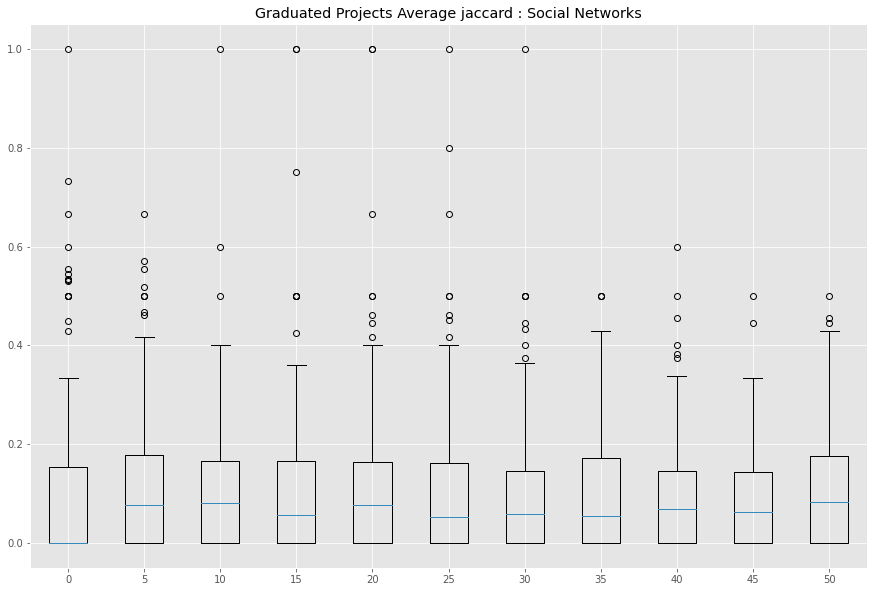

In [20]:
df_social_jaccards_graduated = df_social_jaccards[all_graduated]

plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_social_jaccards_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)



plt.title("Graduated Projects Average jaccard : Social Networks")
plt.boxplot(datas_t, labels=labels_time)
plt.show()

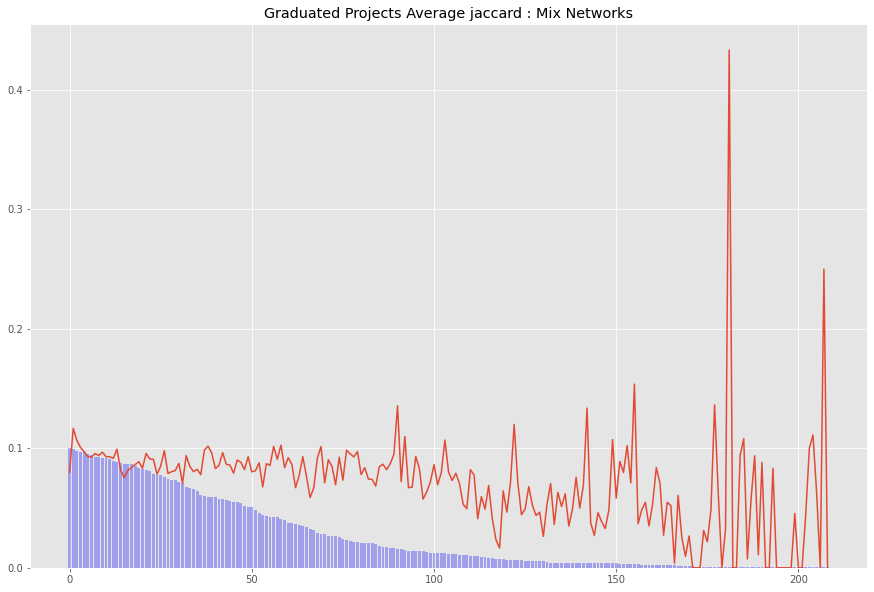

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_mix_jaccards.index))]
count = [0 for i in range(len(df_mix_jaccards.index))]

for col in all_graduated:
    data = df_mix_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])
plt.title("Graduated Projects Average jaccard : Mix Networks")

plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
#print(ave)
#print(count)
plt.show()

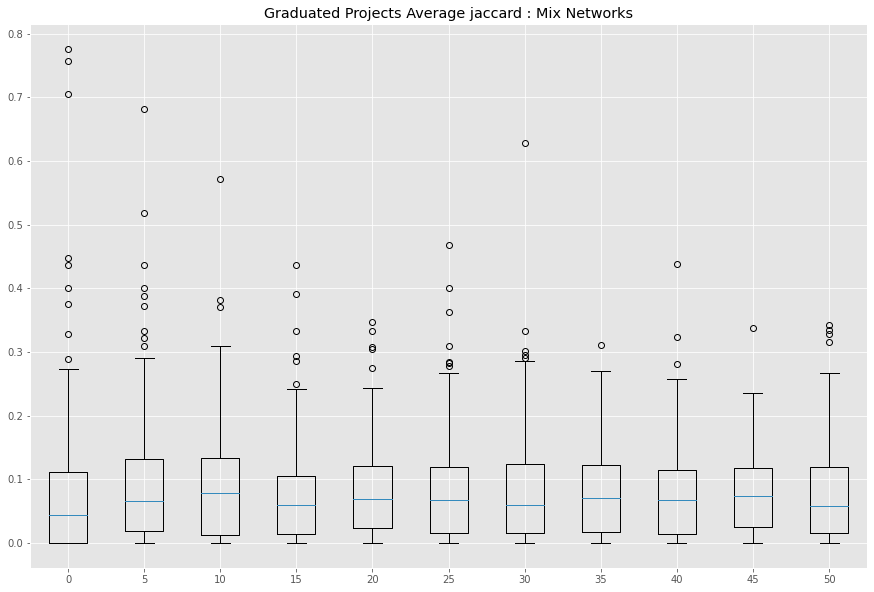

In [22]:
df_mix_jaccards_graduated = df_mix_jaccards[all_graduated]

plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_mix_jaccards_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)



plt.title("Graduated Projects Average jaccard : Mix Networks")
plt.boxplot(datas_t, labels=labels_time)
plt.show()

In [23]:
all_retired = df_proj_tech.where(df_proj_tech['project_status']=='retired')["project_name"].dropna().unique().tolist()

for col in all_retired:
    if col not in df_tech_jaccards:
        all_retired.remove(col)
    elif col not in df_social_jaccards:
        all_retired.remove(col)
#len(all_graduated)
#print(all_graduated)
len(all_retired)
#print(all_graduated)

58

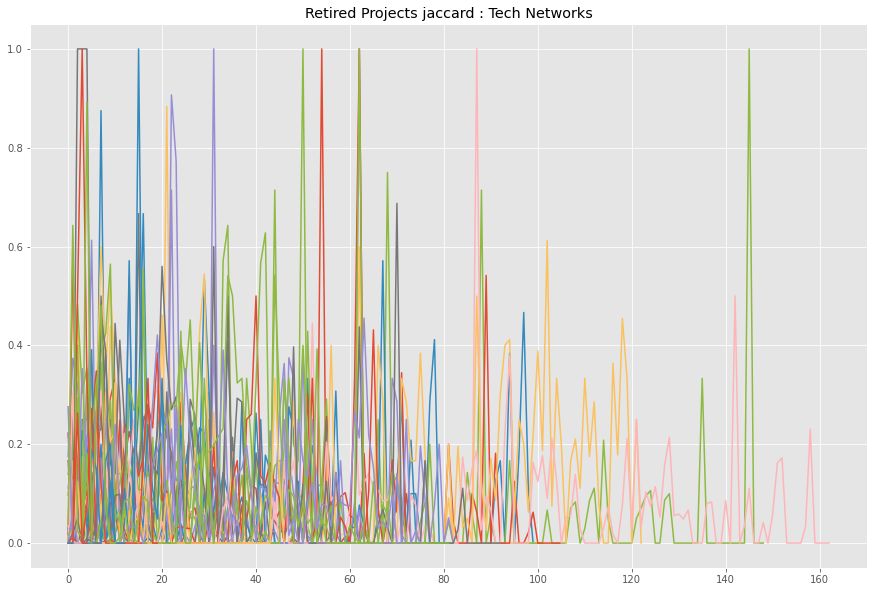

In [24]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

for col in all_retired:
    #print(col)
    data = df_tech_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
    #print(data[:i])

    x = range(len(data[:i]))

    plt.plot(x,data[:i])
    plt.title("Retired Projects jaccard : Tech Networks")
    

<BarContainer object of 163 artists>

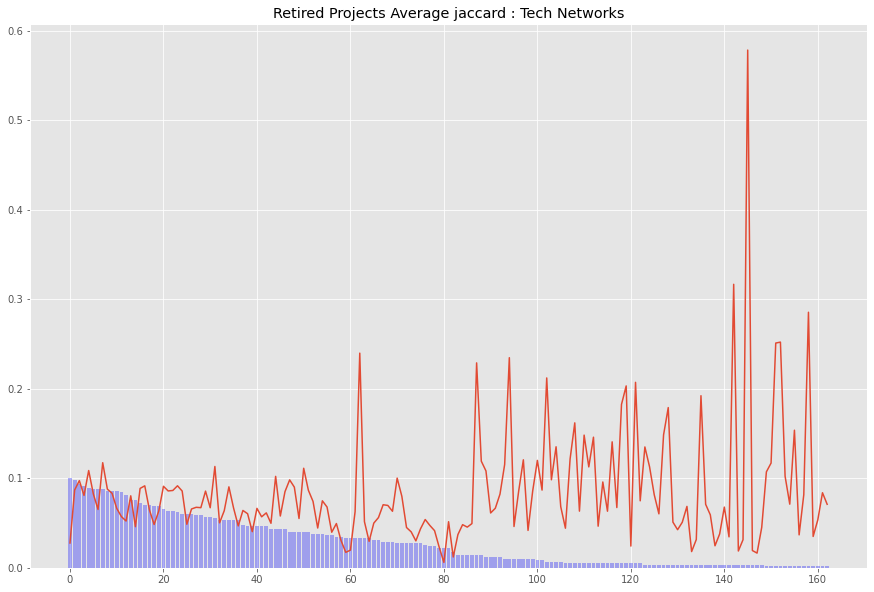

In [25]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

aave = [0 for i in range(len(df_tech_jaccards.index))]
count = [0 for i in range(len(df_tech_jaccards.index))]

for col in all_retired:
    data = df_tech_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave[i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])

plt.title("Retired Projects Average jaccard : Tech Networks")

#print(ave)
#print(count)
len(df_tech_jaccards.loc[0].values)
plt.bar(x,np.array(count[:i])/len(all_retired)/10, fc='b', alpha=0.3)
#plt.boxplot([df_tech_jaccards.loc[0].values], label=[0])

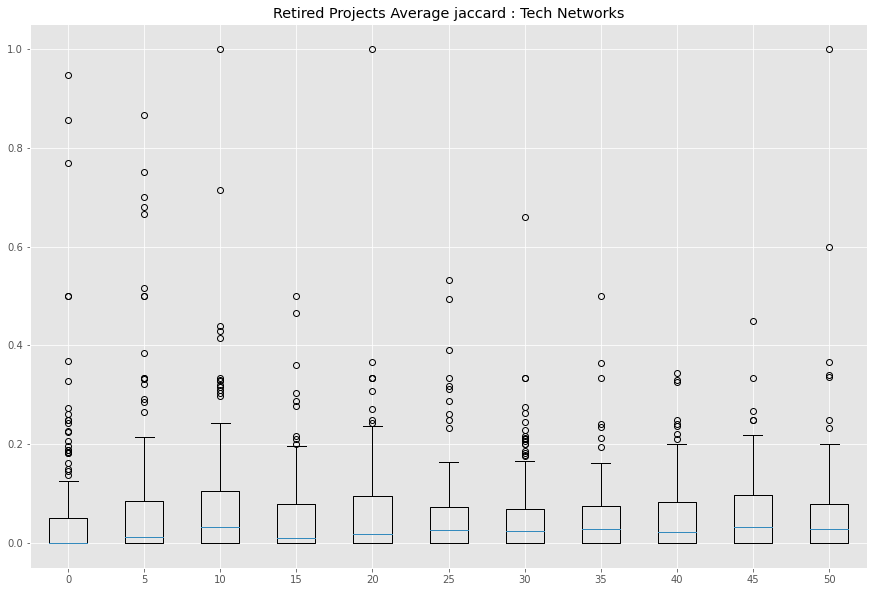

In [26]:
df_tech_jaccards_graduated = df_tech_jaccards[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_tech_jaccards_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)



plt.boxplot(datas_t, labels=labels_time)
plt.title("Retired Projects Average jaccard : Tech Networks")
plt.show()

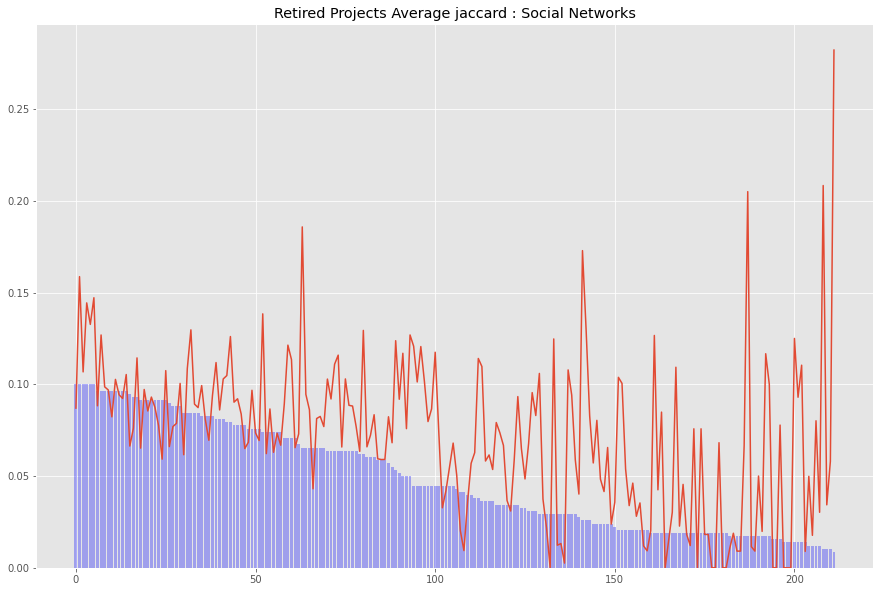

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_social_jaccards.index))]
count = [0 for i in range(len(df_social_jaccards.index))]

for col in all_retired:
    if col not in df_social_jaccards.columns:
        continue
    data = df_social_jaccards[col].values.tolist()
    flag = False
    for i in range(len(ave)):
        if data[i]==-1.0:
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break

    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])
plt.title("Retired Projects Average jaccard : Social Networks")

plt.bar(x,np.array(count[:i])/len(all_retired)/10, fc='b', alpha=0.3)
#print(ave)
#print(count)
plt.show()

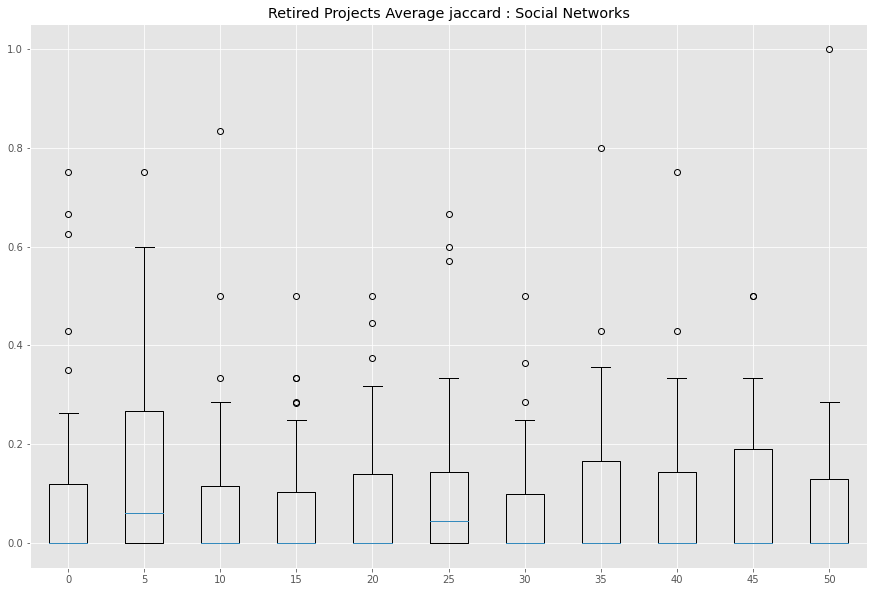

In [28]:
df_social_jaccards_retired = df_social_jaccards[all_retired]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_social_jaccards_retired.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)



plt.boxplot(datas_t, labels=labels_time)
plt.title("Retired Projects Average jaccard : Social Networks")
plt.show()

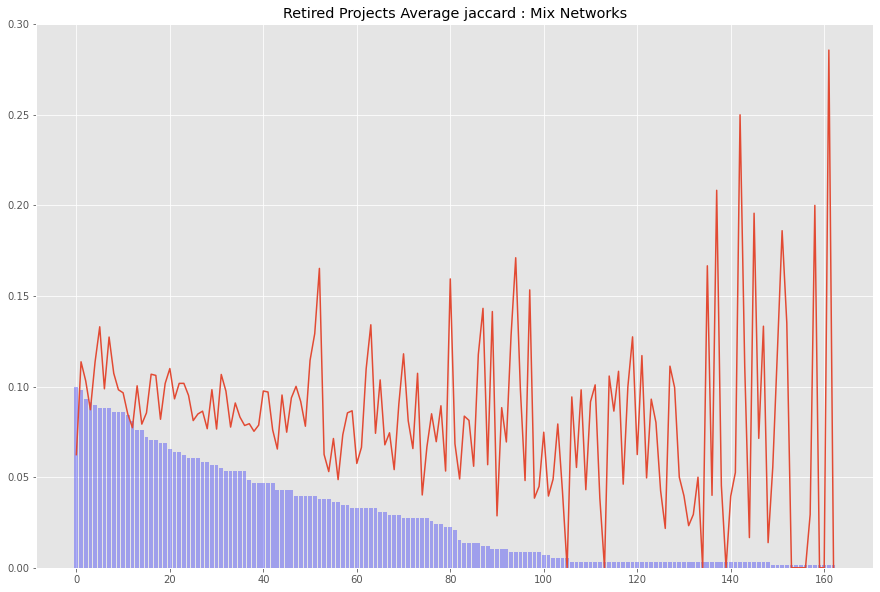

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_mix_jaccards.index))]
count = [0 for i in range(len(df_mix_jaccards.index))]

for col in all_retired:
    data = df_mix_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))

plt.plot(x,ave[:i])
plt.title("Retired Projects Average jaccard : Mix Networks")

plt.bar(x,np.array(count[:i])/len(all_retired)/10, fc='b', alpha=0.3)
#print(ave)
#print(count)
plt.show()

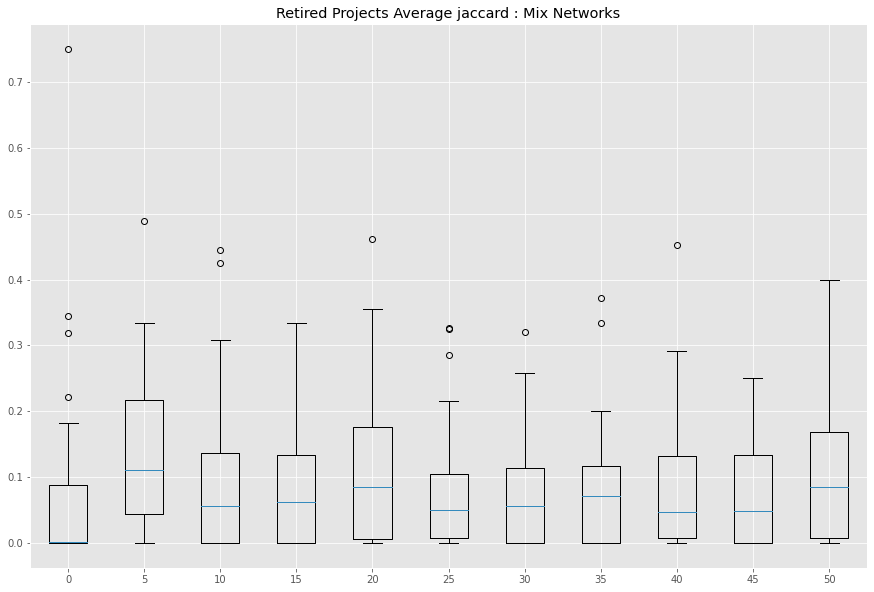

In [30]:
df_mix_jaccards_retired = df_mix_jaccards[all_retired]

plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_mix_jaccards_retired.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t.append(data_thistime)



plt.title("Retired Projects Average jaccard : Mix Networks")
plt.boxplot(datas_t, labels=labels_time)
plt.show()

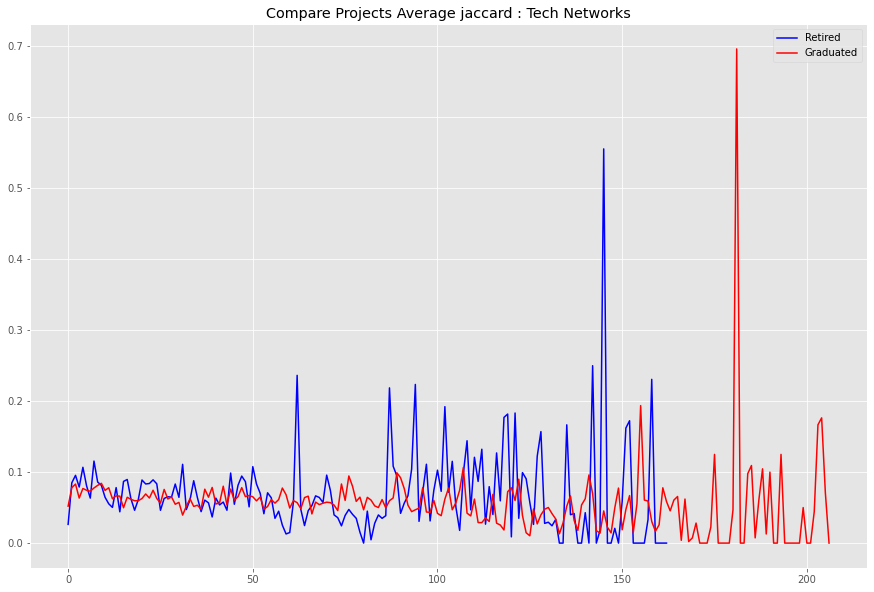

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_tech_jaccards.index))]
count = [0 for i in range(len(df_tech_jaccards.index))]

for col in all_retired:
    data = df_tech_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d1 = ave[:i]

plt.plot(x,d1,color = 'b', label = "Retired")


ave = [0 for i in range(len(df_tech_jaccards.index))]
count = [0 for i in range(len(df_tech_jaccards.index))]

for col in all_graduated:
    data = df_tech_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d2 = ave[:i]
plt.plot(x,d2,color = 'r', label = 'Graduated')
plt.title("Compare Projects Average jaccard : Tech Networks")

#print(ave)
#print(count)
#plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
plt.legend(loc='upper right')

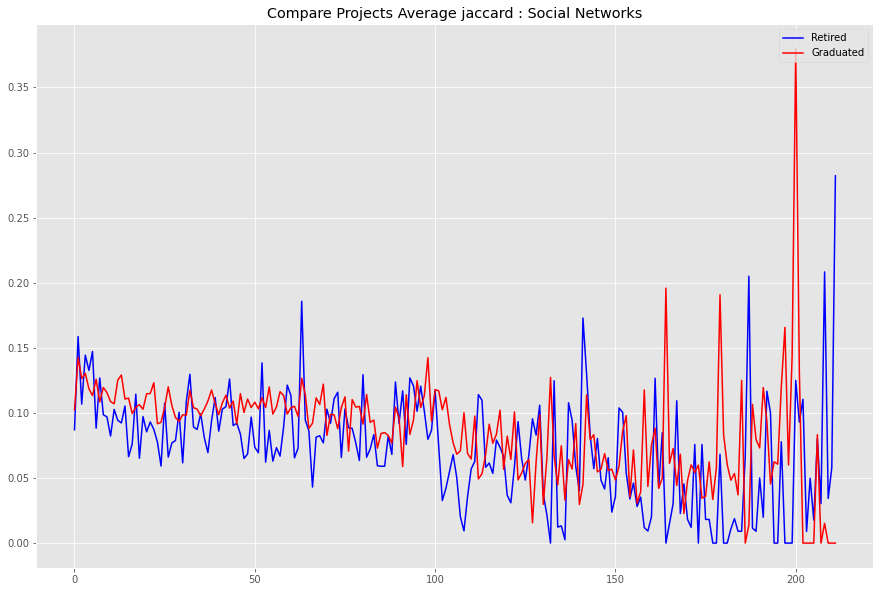

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_social_jaccards.index))]
count = [0 for i in range(len(df_social_jaccards.index))]

for col in all_retired:
    if col not in df_social_jaccards.columns:
        continue
    data = df_social_jaccards[col].values.tolist()
    flag = False
    for i in range(len(ave)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d1 = ave[:i]

plt.plot(x,d1,color = 'b', label = "Retired")



ave = [0 for i in range(len(df_social_jaccards.index))]
count = [0 for i in range(len(df_social_jaccards.index))]

for col in all_graduated:
    data = df_social_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d2 = ave[:i]
plt.plot(x,d2,color = 'r', label = 'Graduated')
plt.title("Compare Projects Average jaccard : Social Networks")

#print(ave)
#print(count)
#plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
plt.legend(loc='upper right')

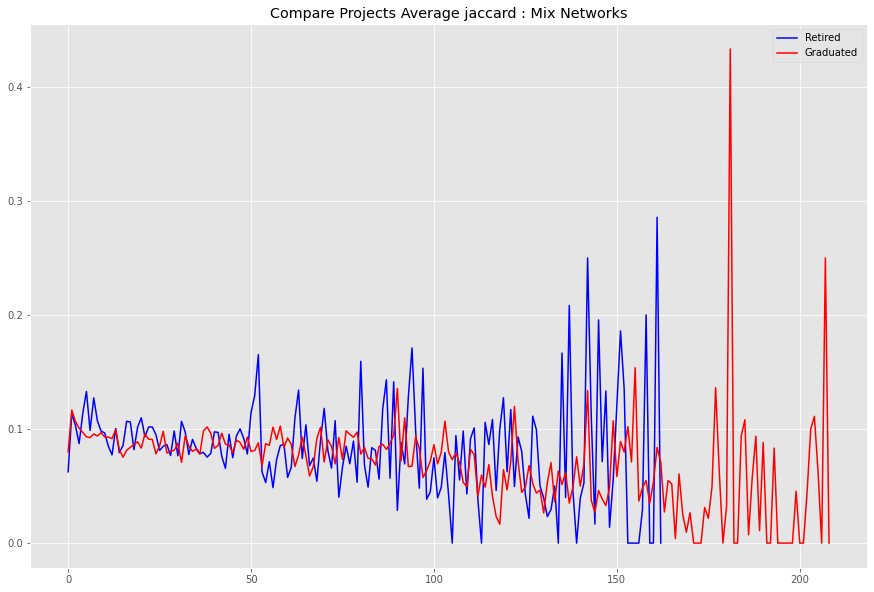

In [33]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_mix_jaccards.index))]
count = [0 for i in range(len(df_mix_jaccards.index))]

for col in all_retired:
    if col not in df_mix_jaccards.columns:
        continue
    data = df_mix_jaccards[col].values.tolist()
    flag = False
    for i in range(len(ave)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d1 = ave[:i]

plt.plot(x,d1,color = 'b', label = "Retired")


ave = [0 for i in range(len(df_mix_jaccards.index))]
count = [0 for i in range(len(df_mix_jaccards.index))]

for col in all_graduated:
    data = df_mix_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d2 = ave[:i]
plt.plot(x,d2,color = 'r', label = 'Graduated')
plt.title("Compare Projects Average jaccard : Mix Networks")

#print(ave)
#print(count)
#plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
plt.legend(loc='upper right')

In [34]:
df_tech_jaccards_graduated = df_tech_jaccards[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_tech_jaccards_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})

df_tech_jaccards_retired = df_tech_jaccards[all_retired]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_jaccards_retired.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_retired.append(data_thistime)


df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average jaccard : Tech Networks")

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


<Figure size 1080x720 with 0 Axes>

In [35]:
df.head(10)

,Time,Graduated,Retired
0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0952380952380952, ...","[0.2222222222222222, 0.0, 0.175, 0.01851851851..."
1,5,"[0.0759493670886076, 0.0421348314606741, 0.0, ...","[0.0, 0.3333333333333333, 0.6129032258064516, ..."
2,10,"[0.1098696461824953, 0.1050420168067226, 0.062...","[0.3333333333333333, 0.0, 0.0, 0.0277777777777..."
3,15,"[0.0288461538461538, 0.1955128205128205, 0.0, ...","[0.1111111111111111, 0.0, 0.1648351648351648, ..."
4,20,"[0.0, 0.2705882352941176, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.04, 0.0, 0.0, 0.0526315789473684, 0.09..."
5,25,"[0.0769230769230769, 0.09375, 0.0, 0.0, 0.0, 0...","[0.0, 0.1, 0.0166666666666666, 0.0, 0.08860759..."
6,30,"[0.0695652173913043, 0.0581395348837209, 0.0, ...","[0.0, 0.1052631578947368, 0.3043478260869565, ..."
7,35,"[0.0212765957446808, 0.0371621621621621, 0.030...","[0.0, 0.1428571428571428, 0.1666666666666666, ..."
8,40,"[0.0161290322580645, 0.0643274853801169, 0.0, ...","[0.0, 0.2631578947368421, 0.0, 0.0, 0.16417910..."
9,45,"[0.0192307692307692, 0.1435726210350584, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.08, 0.0, 0.0, 0.0, 0.06..."


In [36]:
df = df.explode("Graduated")
df = df.explode("Retired")

Text(0.5, 1.0, 'Compare Projects Average jaccard : Tech Networks')

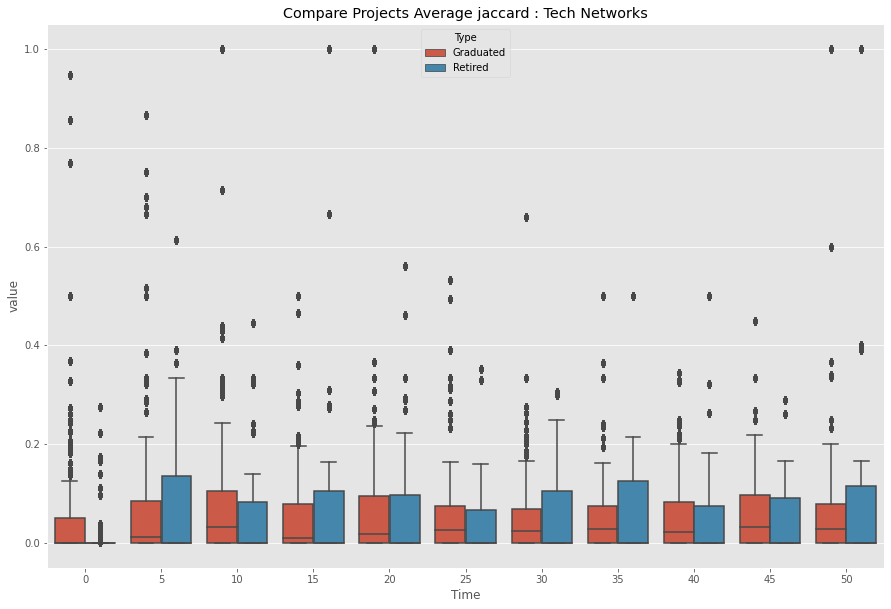

In [37]:
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')

plt.title("Compare Projects Average jaccard : Tech Networks")

In [38]:
df_social_jaccards_graduated = df_social_jaccards[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_social_jaccards_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
df_social_jaccards_retired = pd.DataFrame()
for col in all_retired:
    if col not in df_social_jaccards.columns:
        continue
    df_social_jaccards_retired[col] = df_social_jaccards[col]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_jaccards_retired.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_retired.append(data_thistime)


df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average jaccard : social Networks")

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Projects Average jaccard : Social Networks')

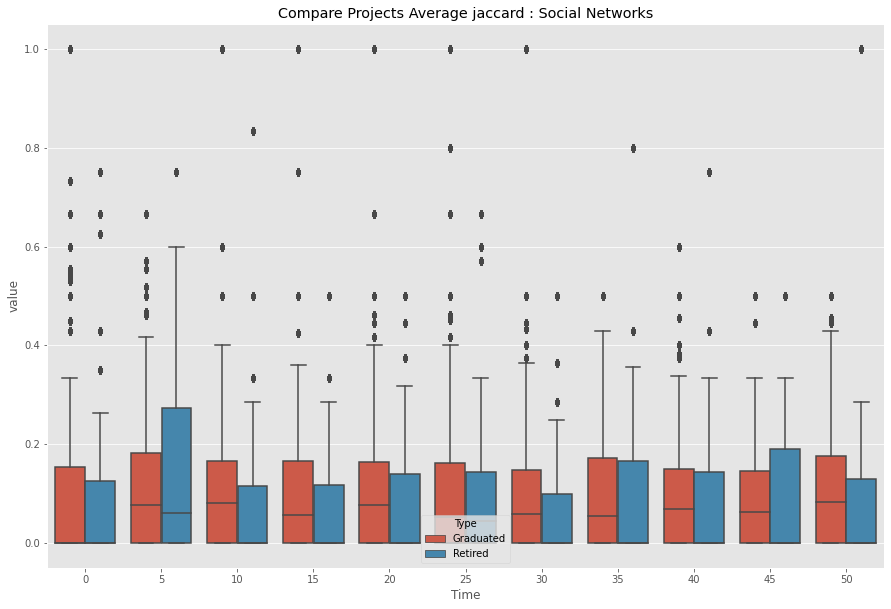

In [39]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')

plt.title("Compare Projects Average jaccard : Social Networks")

In [40]:
df_mix_jaccards_graduated = df_mix_jaccards[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
for time in labels_time:
    data_thistime = df_mix_jaccards_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
df_mix_jaccards_retired = pd.DataFrame()
for col in all_retired:
    if col not in df_mix_jaccards.columns:
        continue
    df_mix_jaccards_retired[col] = df_mix_jaccards[col]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
labels_time = [0,5,10,15,20,25,30,35,40,45,50]
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_mix_jaccards_retired.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_retired.append(data_thistime)


df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average jaccard : social Networks")

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


<Figure size 1080x720 with 0 Axes>

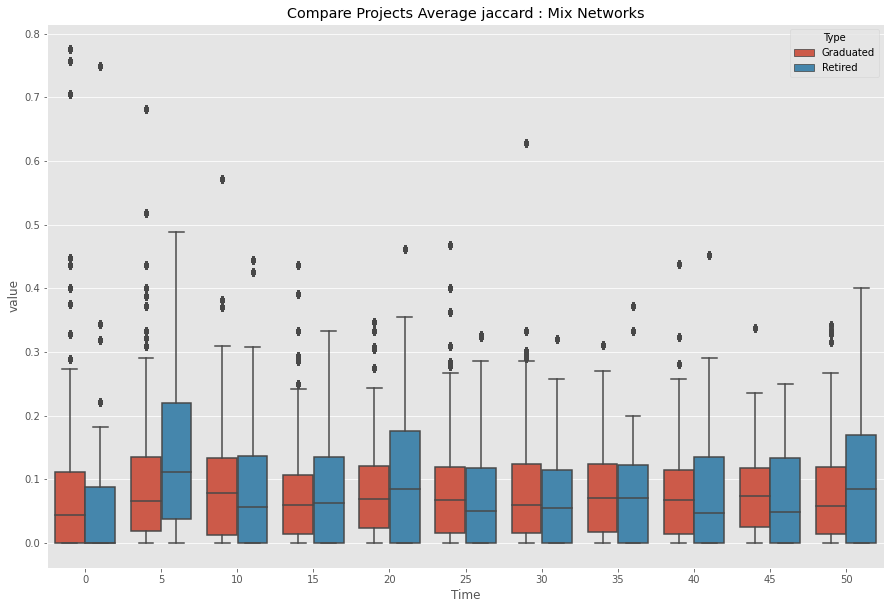

In [41]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')

plt.title("Compare Projects Average jaccard : Mix Networks")
plt.show()

(0.0, 157.0)

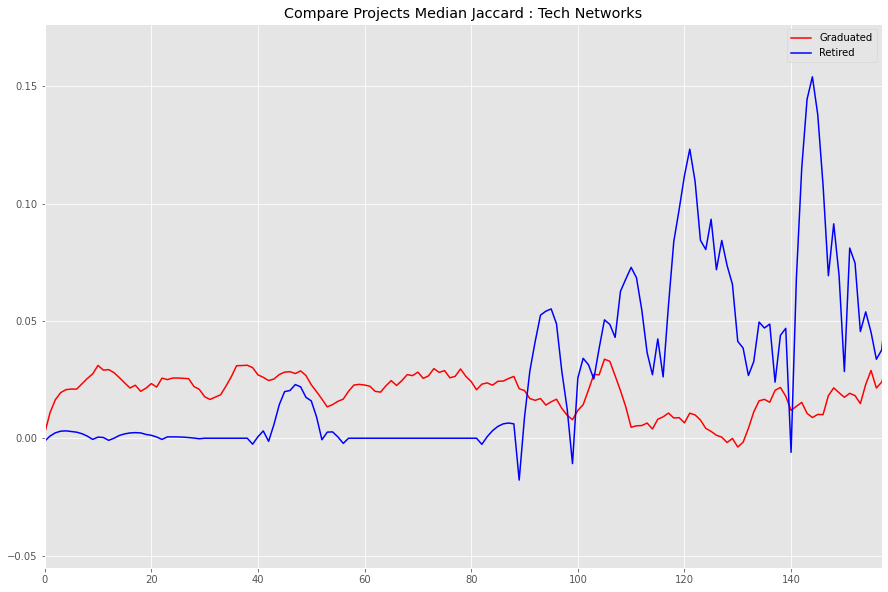

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [[] for i in range(len(df_tech_jaccards.index))]
count = [0 for i in range(len(df_tech_jaccards.index))]

for col in all_graduated:
    data = df_tech_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave[i].append(data[i])
        count[i]+=1
for j in range(len(ave)):
    if count[j]==0:
        break
    ave[j]= np.median(ave[j])

x = [x for x in range(len(ave[:j]))]
d1 = ave[:j]
from scipy.signal import savgol_filter
d1 = savgol_filter(ave[:j], 11, 3)

plt.plot(x,d1,color = 'r', label = "Graduated")

all_r = list()
for x in all_retired:
    if x in df_tech_jaccards.columns:
        all_r.append(x)

ave = [[] for i in range(len(df_tech_jaccards.index))]
count = [0 for i in range(len(df_tech_jaccards.index))]

for col in all_r:
    data = df_tech_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave[i].append(data[i])
        count[i]+=1
for j in range(len(ave)):
    if count[j]==0:
        break
    ave[j]= np.median(ave[j])

x = [x for x in range(len(ave[:j]))]
d2 = ave[:j]
#from scipy.signal import savgol_filter
d2 = savgol_filter(ave[:j], 11, 3)

plt.plot(x,d2,color = 'b', label = 'Retired')
plt.title("Compare Projects Median Jaccard : Tech Networks")

#print(ave)
#print(count)
#plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
plt.legend(loc='upper right')
plt.xlim(0, 157)

(0.0, 157.0)

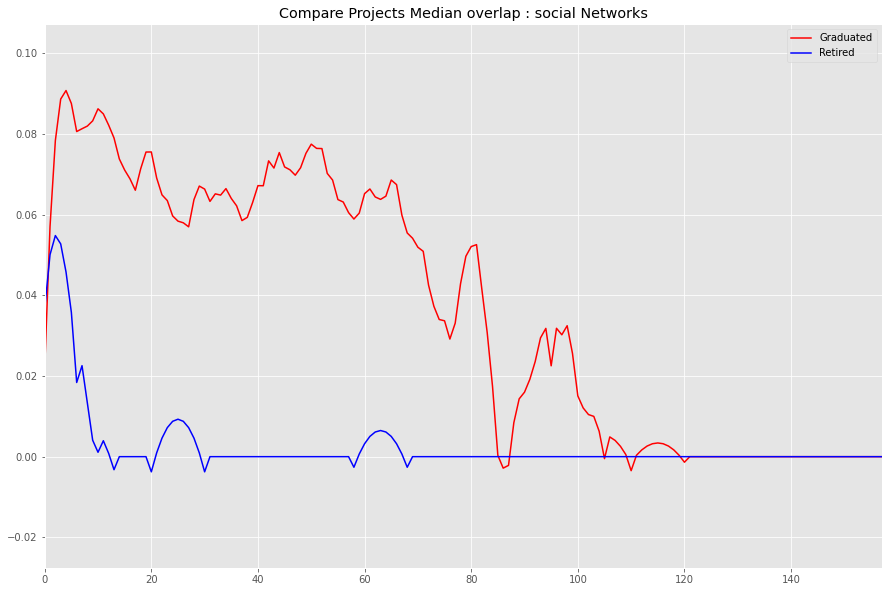

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [[] for i in range(len(df_social_jaccards.index))]
count = [0 for i in range(len(df_social_jaccards.index))]

for col in all_graduated:
    data = df_social_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave[i].append(data[i])
        count[i]+=1
for j in range(len(ave)):
    if count[j]==0:
        break
    ave[j]= np.median(ave[j])

x = [x for x in range(len(ave[:j]))]
d1 = ave[:j]
from scipy.signal import savgol_filter
d1 = savgol_filter(ave[:j], 11, 3)

plt.plot(x,d1,color = 'r', label = "Graduated")

all_r = list()
for x in all_retired:
    if x in df_social_jaccards.columns:
        all_r.append(x)

ave = [[] for i in range(len(df_social_jaccards.index))]
count = [0 for i in range(len(df_social_jaccards.index))]

for col in all_r:
    data = df_social_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave[i].append(data[i])
        count[i]+=1
for j in range(len(ave)):
    if count[j]==0:
        break
    ave[j]= np.median(ave[j])

x = [x for x in range(len(ave[:j]))]
d2 = ave[:j]
#from scipy.signal import savgol_filter
d2 = savgol_filter(ave[:j], 11, 3)

plt.plot(x,d2,color = 'b', label = 'Retired')
plt.title("Compare Projects Median overlap : social Networks")

#print(ave)
#print(count)
#plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
plt.legend(loc='upper right')
plt.xlim(0, 157)

(0.0, 157.0)

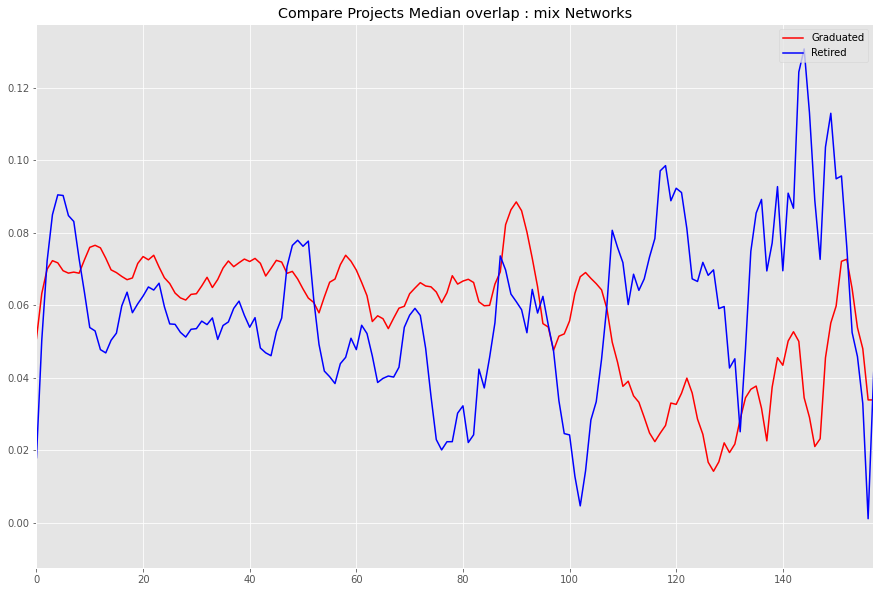

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [[] for i in range(len(df_mix_jaccards.index))]
count = [0 for i in range(len(df_mix_jaccards.index))]

all_r = list()
for x in all_graduated:
    if x in df_mix_jaccards.columns:
        all_r.append(x)

for col in all_r:
    data = df_mix_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave[i].append(data[i])
        count[i]+=1
for j in range(len(ave)):
    if count[j]==0:
        break
    ave[j]= np.median(ave[j])

x = [x for x in range(len(ave[:j]))]
d1 = ave[:j]
from scipy.signal import savgol_filter
d1 = savgol_filter(ave[:j], 11, 3)

plt.plot(x,d1,color = 'r', label = "Graduated")

all_r = list()
for x in all_retired:
    if x in df_mix_jaccards.columns:
        all_r.append(x)

ave = [[] for i in range(len(df_mix_jaccards.index))]
count = [0 for i in range(len(df_mix_jaccards.index))]

for col in all_r:
    data = df_mix_jaccards[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave[i].append(data[i])
        count[i]+=1
for j in range(len(ave)):
    if count[j]==0:
        break
    ave[j]= np.median(ave[j])

x = [x for x in range(len(ave[:j]))]
d2 = ave[:j]
from scipy.signal import savgol_filter
d2 = savgol_filter(ave[:j], 11, 3)

plt.plot(x,d2,color = 'b', label = 'Retired')
plt.title("Compare Projects Median overlap : mix Networks")

#print(ave)
#print(count)
#plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
plt.legend(loc='upper right')
plt.xlim(0, 157)